In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv('advertising.csv')
sales.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [14]:
from sklearn.linear_model import LinearRegression

In [9]:
x = sales[['TV','radio','newspaper']]
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [12]:
y = sales['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [16]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [17]:
lr.intercept_

2.938889369459412

In [18]:
lr.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [20]:
pars = pd.DataFrame({
    'Coef':[lr.intercept_]+list(lr.coef_)
})
pars.index = ['Intersección']+list(x.columns)
pars

,Coef
Intersección,2.938889
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [21]:
lr.score(x,y)

0.8972106381789522

In [22]:
yp = lr.predict(x)
resume = pd.DataFrame({'y':y,'yp':yp})
resume

,y,yp
0,22.1,20.523974
1,10.4,12.337855
2,9.3,12.307671
3,18.5,17.597830
4,12.9,13.188672
...,...,...
195,7.6,5.370342
196,9.7,8.165312
197,12.8,12.785921
198,25.5,23.767321


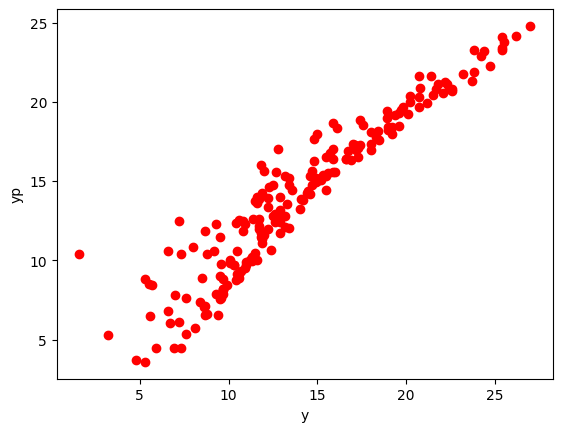

In [23]:
plt.plot(resume['y'],resume['yp'],'ro')
plt.xlabel('y')
plt.ylabel('yp')
plt.show()

In [24]:
from sklearn.metrics import r2_score

r2_1 = r2_score(y,yp)
r2_1

0.8972106381789522

In [25]:
resume = pd.DataFrame({
    'y':y,
    'yp':yp,
    'e':y-yp,
    'e^2':(y-yp)**2
})

resume.head()

,y,yp,e,e^2
0,22.1,20.523974,1.576026,2.483857
1,10.4,12.337855,-1.937855,3.755281
2,9.3,12.307671,-3.007671,9.046084
3,18.5,17.597830,0.902170,0.813912
4,12.9,13.188672,-0.288672,0.083331


In [26]:
resume['e^2'].mean()

2.784126314510936

In [28]:
from sklearn.metrics import mean_squared_error
rms_1 = mean_squared_error(y,yp)
rms_1

2.784126314510936

In [29]:
x2 = x.drop('newspaper',axis=1)
x2.head()

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [30]:
lr2 = LinearRegression().fit(x2,y)

In [32]:
pars = pd.DataFrame({
    'Coef':[lr2.intercept_]+list(lr2.coef_)
})
pars.index = ['Intersección']+list(x2.columns)
pars

,Coef
Intersección,2.921100
TV,0.045755
radio,0.187994


In [34]:
yp2 = lr2.predict(x2)

r2_2 = r2_score(y,yp2)
rms_2 = mean_squared_error(y,yp2)

print('R2 = '+str(r2_2))
print('RMS = ' + str(rms_2))

R2 = 0.8971942610828957
RMS = 2.784569900338091


In [36]:
x3 = x2.drop('radio',axis=1)
x3.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [37]:
x4 = x2.drop('TV',axis = 1)
x4.head()

,radio
0,37.8
1,39.3
2,45.9
3,41.3
4,10.8


In [38]:
lr3 = LinearRegression().fit(x3,y)
lr4 = LinearRegression().fit(x4,y)

In [39]:
yp3 = lr3.predict(x3)

r2_3 = r2_score(y,yp3)
rms_3 = mean_squared_error(y,yp3)

print('R2 3er modelo solo TV = '+str(r2_3))
print('RMS 3er modelo solo TV= ' + str(rms_3))

yp4 = lr4.predict(x4)

r2_4 = r2_score(y,yp4)
rms_4 = mean_squared_error(y,yp4)

print('R2 4to modelo solo radio = '+str(r2_4))
print('RMS 4to modelo solo radio = ' + str(rms_4))

R2 3er modelo solo TV = 0.611875050850071
RMS 3er modelo solo TV= 10.512652915656757
R2 4to modelo solo radio = 0.33203245544529525
RMS 4to modelo solo radio = 18.09239774512544
